# サポートベクターマシン（SVM）の分離平面の可視化  
この記事では、サポートベクトルマシン（SVM）を用いて、分類を行ったときの、分離のための超平面を可視化することを行います。ここでは、3つの変数を説明変数として用いて、3次元プロットによる可視化を行います。  

可視化におけるポイントは、  
1. XYZの範囲内でその値を小刻みに変更しながらグリッドを作成する  
2. そのデータに対してSVMによる分類を行う  
3. そのときの結果の中で、分類平面に近いデータを取り出す  
4. そのデータを訓練データと重ね合わせて表示する  
ということです。

## モジュールのインポート  
この例では、jupyter notebookを用いています。点を3D上でプロットして、くるくると回すために、`%matplotlib notebook`と指定します。

In [1]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
%matplotlib notebook

## irisデータセットの読み込み  
ここでは、irisデータセットを用います

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :3]  # 3つの変数のみを用いる
Y = iris.target
# 用いるデータの作成
X = X[np.logical_or(Y==0,Y==1)]
Y = Y[np.logical_or(Y==0,Y==1)]

## SVMの学習  
ここでは、ガウシアンカーネルを用いて学習を行います。線形カーネルで行う場合は、"linear"と指定します。

In [3]:
# 分類器の準備
model = svm.SVC(kernel='rbf',probability=True)
# 学習
clf = model.fit(X, Y)

## 分離平面を可視化するためのテストデータを作成する  
各変数の最大値と最小値を求め、その範囲でテストデータを作成します。`mesh_size`という変数で、その間隔を制御します。小さい値に設定すると、より厳密な分離平面を得ることができますが、一方で、計算時間が長くなります。

In [4]:
# データを作成する間隔
mesh_size = 0.2
# 変数をそれぞれ、x1, x2, x3とする
x1 = X[:,0]
x2 = X[:,1]
x3 = X[:,2]
# 作成する範囲を大きくしたい場合marginを0より大きい値にする
margin = 0
# xyzの最小、最大値を求める
x_min, x_max = x1.min() - margin, x1.max() + margin
y_min, y_max = x2.min() - margin, x2.max() + margin
z_min, z_max = x3.min() - margin, x3.max() + margin
# mesh_sizeに応じて点を作成する
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
zrange = np.arange(z_min, z_max, mesh_size)
x,y,z = np.meshgrid(xrange,yrange,zrange)
# flatten
x = x.reshape(-1)
y = y.reshape(-1)
z = z.reshape(-1)

## 分離平面を可視化するためのテストデータと訓練データを重ね合わせる  
前のセクションで作成したテストデータが、訓練データと重なっているかを確認する

<IPython.core.display.Javascript object>


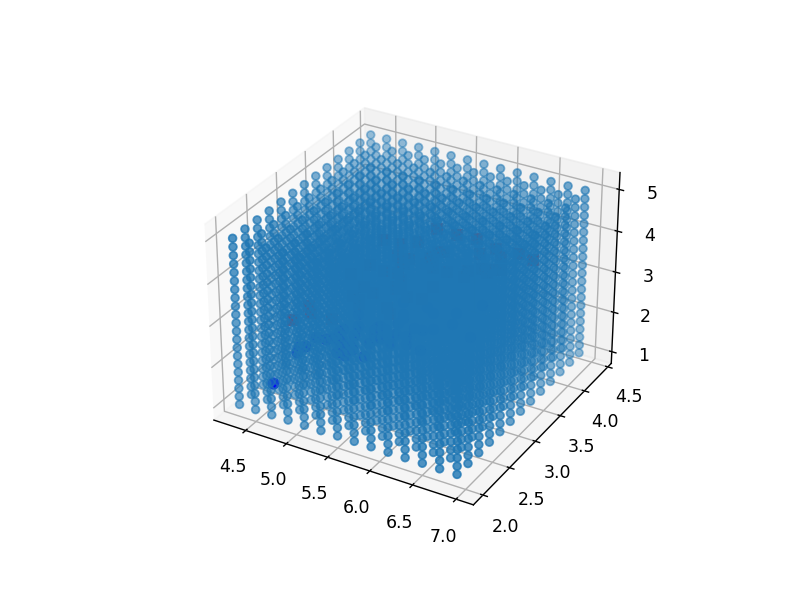

In [5]:
# 可視化
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
# テストデータのプロット
ax.scatter(x, y, z)
# 訓練データのプロット
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
plt.show()

## テストデータの予測

In [6]:
xyz = np.vstack([x,y,z])
xyz = xyz.T
y_pred = clf.predict_proba(xyz)

## クラスAとBの確率が等しいテストデータを抽出

In [7]:
diff = y_pred[:,0]-y_pred[:,1]
idx = np.where(np.abs(diff)<0.1)
xyz = xyz[idx,:]
out = np.squeeze(xyz)

## 分離平面の可視化  
最後に、前のセクションで取り出した点ともとの訓練データを重ねて表示させます。これにより、うまく分離平面が可視化できていることがわかります。

<IPython.core.display.Javascript object>


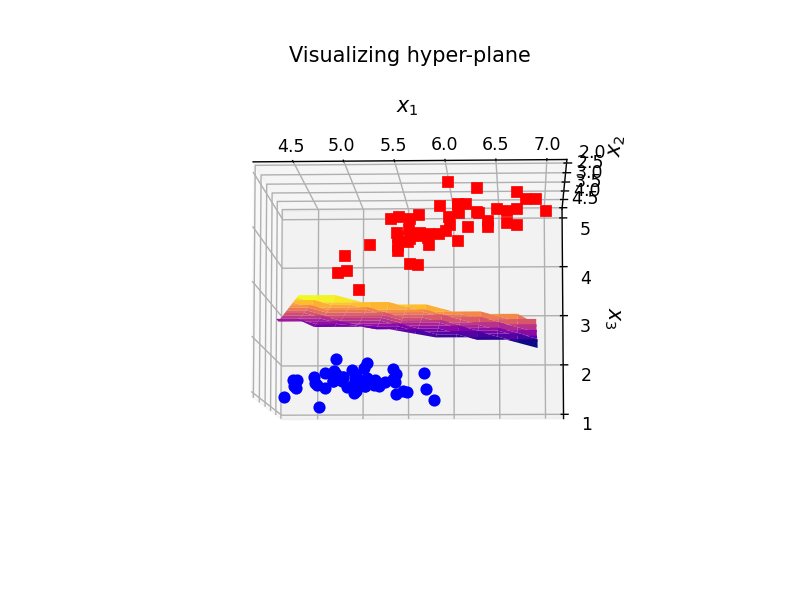

In [8]:
# クラスAとBの確率がほぼ等しい点のx,y,z情報を抽出する
x_selected = out[:,0]
y_selected = out[:,1]
z_selected = out[:,2]
# surfaceプロットをするための準備
x_new, y_new = np.meshgrid(np.unique(x_selected), np.unique(y_selected))
z_new = griddata((x_selected, y_selected), z_selected, (x_new, y_new))

# 可視化
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot3D(X[Y==0,0], X[Y==0,1], X[Y==0,2],'ob')
ax.plot3D(X[Y==1,0], X[Y==1,1], X[Y==1,2],'sr')
# surfaceの可視化
ax.plot_surface(x_new, y_new, z_new,cmap='plasma')
ax.set_xlabel(r"$x_1$", fontsize=12)
ax.set_ylabel(r"$x_2$", fontsize=12)
ax.set_zlabel(r"$x_3$", fontsize=12)
ax.set_title("Visualizing hyper-plane", fontsize=12)
plt.show()

## 参考文献  
以下の記事などが参考になりました。著書の皆様、ありがとうございました。  

https://qiita.com/thtitech/items/4c0777f3825572d7e0eb  
https://qiita.com/kzm4269/items/8ea85f3d90caecef704b  
https://stackoverflow.com/questions/51278752/visualize-2d-3d-decision-surface-in-svm-scikit-learn